In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Parameter

In [22]:
# Parameters for consumer spending ODE
alpha = 0.7
beta = 0.5
g = 0.02
U = 180000
P = 96000
r = 0.05
max_interest_increase = 0.25
L0 = 2000000
A0 = 480000
F0 = 72000

# Parameters for inflation ODE
alpha_inflation = 0.02
inflation_threshold = 0.006
inflation_slope_threshold = 0.03

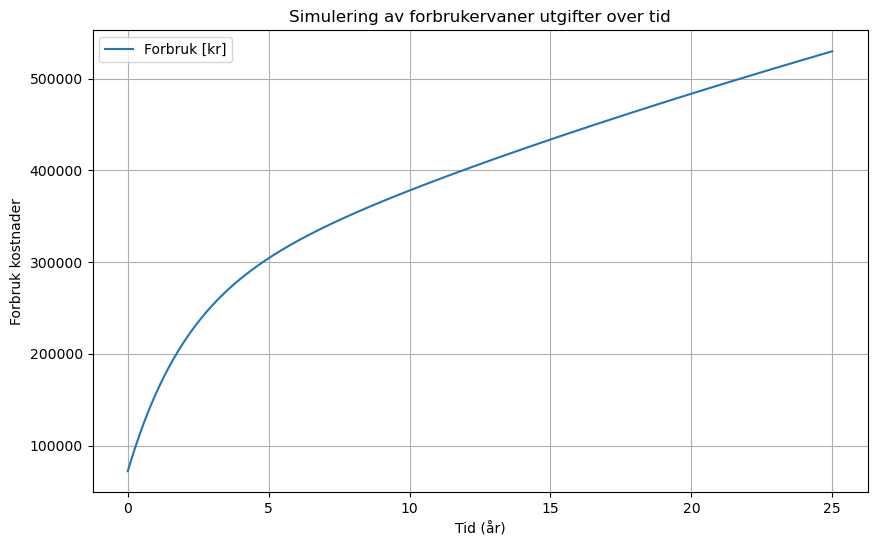

In [23]:
# ODE system
def dFdt(F, t, alpha, beta, g, U, P, r, L0, A0):
    L = L0 * np.exp(-r * t) - P * t  # Loan decreasing over time
    dF = alpha * (A0 - U - r * L) - beta * F
    return dF

# Time vector from 0 to 25 years
t = np.linspace(0, 25, 10000)

# Solve ODE
F = odeint(dFdt, F0, t, args=(alpha, beta, g, U, P, r, L0, A0))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, F, label='Forbruk [kr]')
plt.title('Simulering av forbrukervaner utgifter over tid')
plt.xlabel('Tid (år)')
plt.ylabel('Forbruk kostnader')
plt.legend()
plt.grid(True)
plt.show()


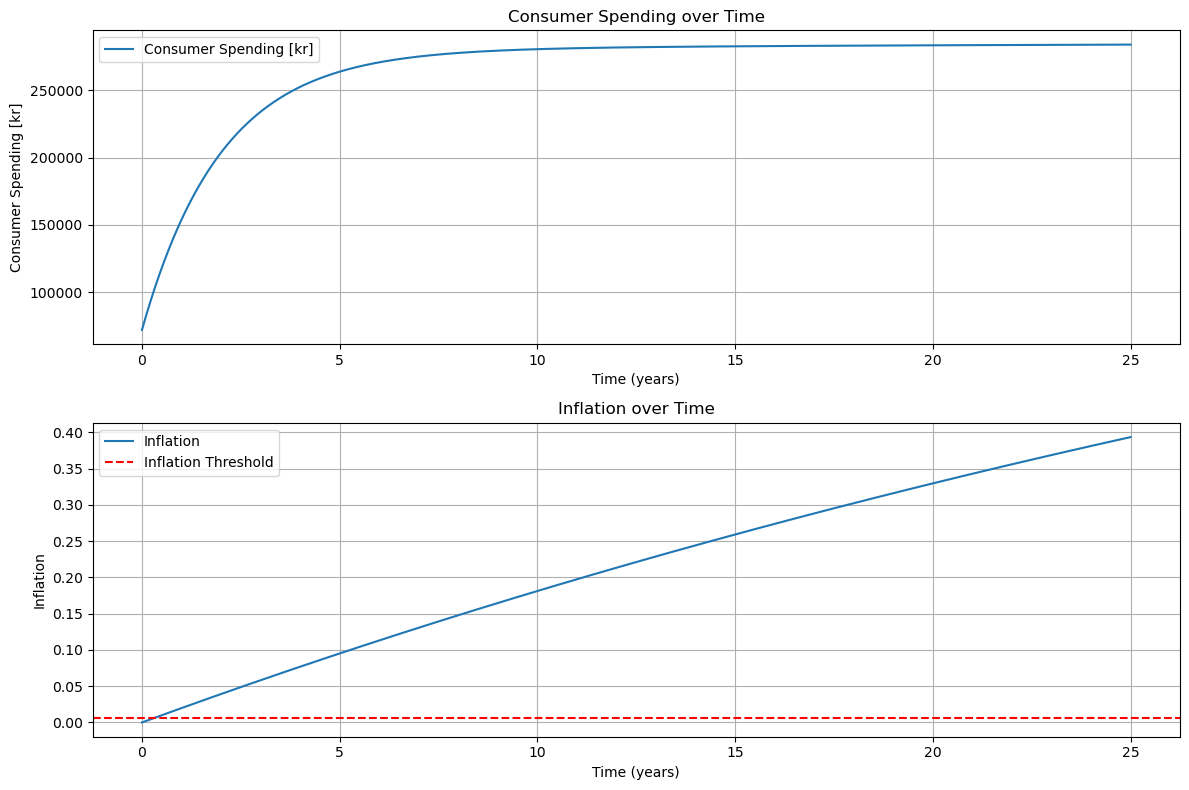

In [24]:
# ODE system for consumer spending and inflation
def coupled_odes(y, t, alpha, beta, g, U, P, r, L0, A0, alpha_inflation, inflation_threshold):
    F, inflation, L = y
    
    # Consumer spending ODE
    dF = alpha * (A0 - U - r * L) - beta * F
    
    # Inflation ODE
    if F/A0 > inflation_threshold:
        dinflation = alpha_inflation * (1 - inflation)
    else:
        dinflation = -alpha_inflation * inflation
    
    # Loan decreasing over time
    dL = -r * L + P
    
    return [dF, dinflation, dL]

# Initial conditions
y0 = [F0, 0, L0]

# Time vector from 0 to 25 years
t = np.linspace(0, 25, 10000)

# Solve coupled ODEs
solution = odeint(coupled_odes, y0, t, args=(alpha, beta, g, U, P, r, L0, A0, alpha_inflation, inflation_threshold))

# Plot results
plt.figure(figsize=(12, 8))

# Plot consumer spending
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0], label='Consumer Spending [kr]')
plt.title('Consumer Spending over Time')
plt.xlabel('Time (years)')
plt.ylabel('Consumer Spending [kr]')
plt.legend()
plt.grid(True)

# Plot inflation
plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1], label='Inflation')
plt.axhline(y=inflation_threshold, color='r', linestyle='--', label='Inflation Threshold')
plt.title('Inflation over Time')
plt.xlabel('Time (years)')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

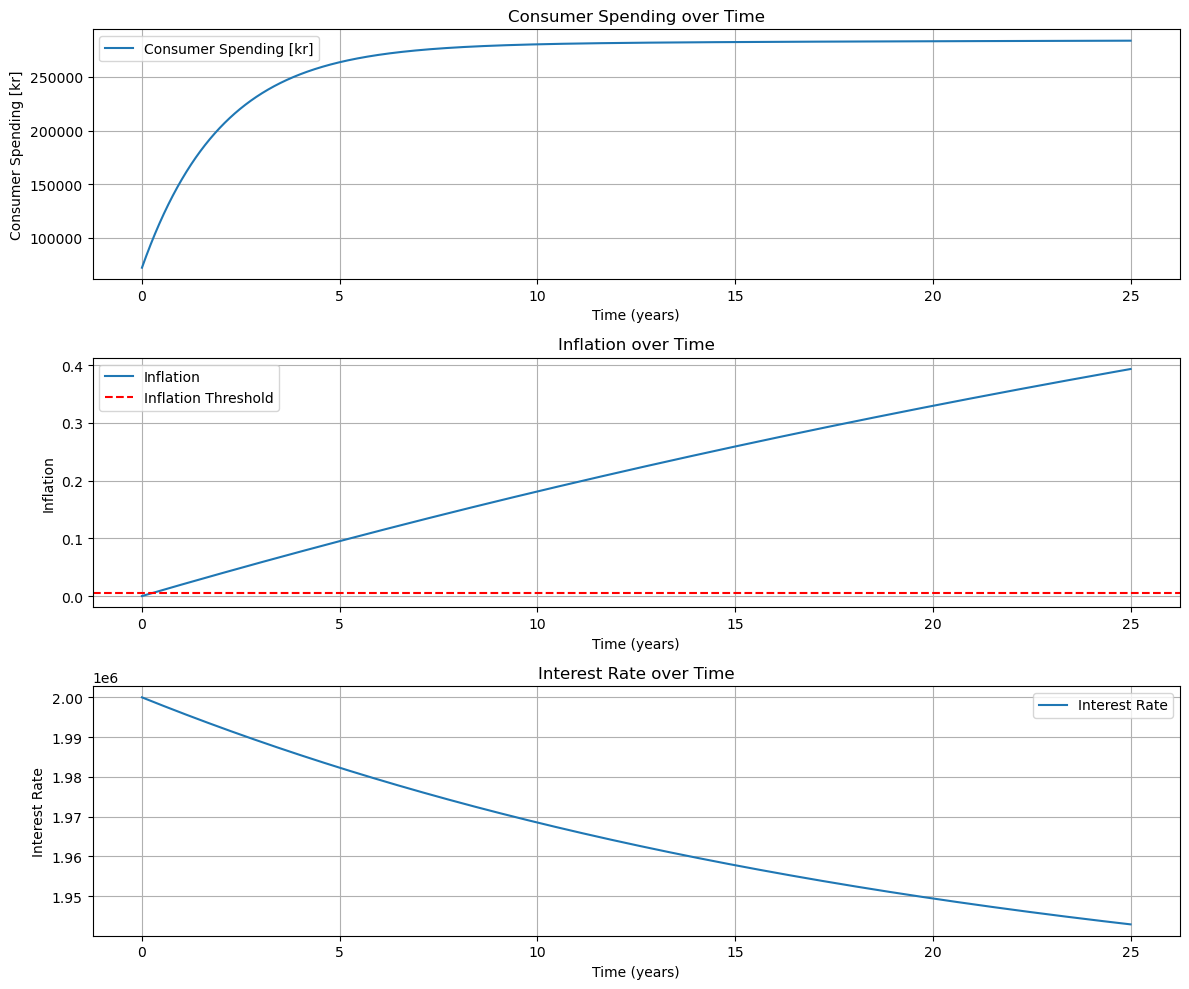

In [25]:
# ODE system for consumer spending and inflation
def coupled_odes(y, t, alpha, beta, g, U, P, r, max_interest_increase, L0, A0, alpha_inflation, inflation_threshold, inflation_slope_threshold):
    F, inflation, L = y
    
    # Consumer spending ODE
    dF = alpha * (A0 - U - r * L) - beta * F
    
    # Inflation ODE
    if F/A0 > inflation_threshold:
        dinflation = alpha_inflation * (1 - inflation)
    else:
        dinflation = -alpha_inflation * inflation
    
    # Loan decreasing over time
    dL = -r * L + P
    
    return [dF, dinflation, dL]

# Initial conditions
y0 = [F0, 0, L0]

# Time vector from 0 to 25 years
t = np.linspace(0, 25, 10000)

# Solve coupled ODEs
solution = odeint(coupled_odes, y0, t, args=(alpha, beta, g, U, P, r, max_interest_increase, L0, A0, alpha_inflation, inflation_threshold, inflation_slope_threshold))

# Plot results
plt.figure(figsize=(12, 10))

# Plot consumer spending
plt.subplot(3, 1, 1)
plt.plot(t, solution[:, 0], label='Consumer Spending [kr]')
plt.title('Consumer Spending over Time')
plt.xlabel('Time (years)')
plt.ylabel('Consumer Spending [kr]')
plt.legend()
plt.grid(True)

# Plot inflation
plt.subplot(3, 1, 2)
plt.plot(t, solution[:, 1], label='Inflation')
plt.axhline(y=inflation_threshold, color='r', linestyle='--', label='Inflation Threshold')
plt.title('Inflation over Time')
plt.xlabel('Time (years)')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

# Plot interest rate
plt.subplot(3, 1, 3)
plt.plot(t, solution[:, 2], label='Interest Rate')
plt.title('Interest Rate over Time')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

c:\Users\even\anaconda3\lib\site-packages\scipy\integrate\_ode.py:387: UserWarning: No integrator name match with 'RK23' or is not available.
  warnings.warn('No integrator name match with %r or is not '


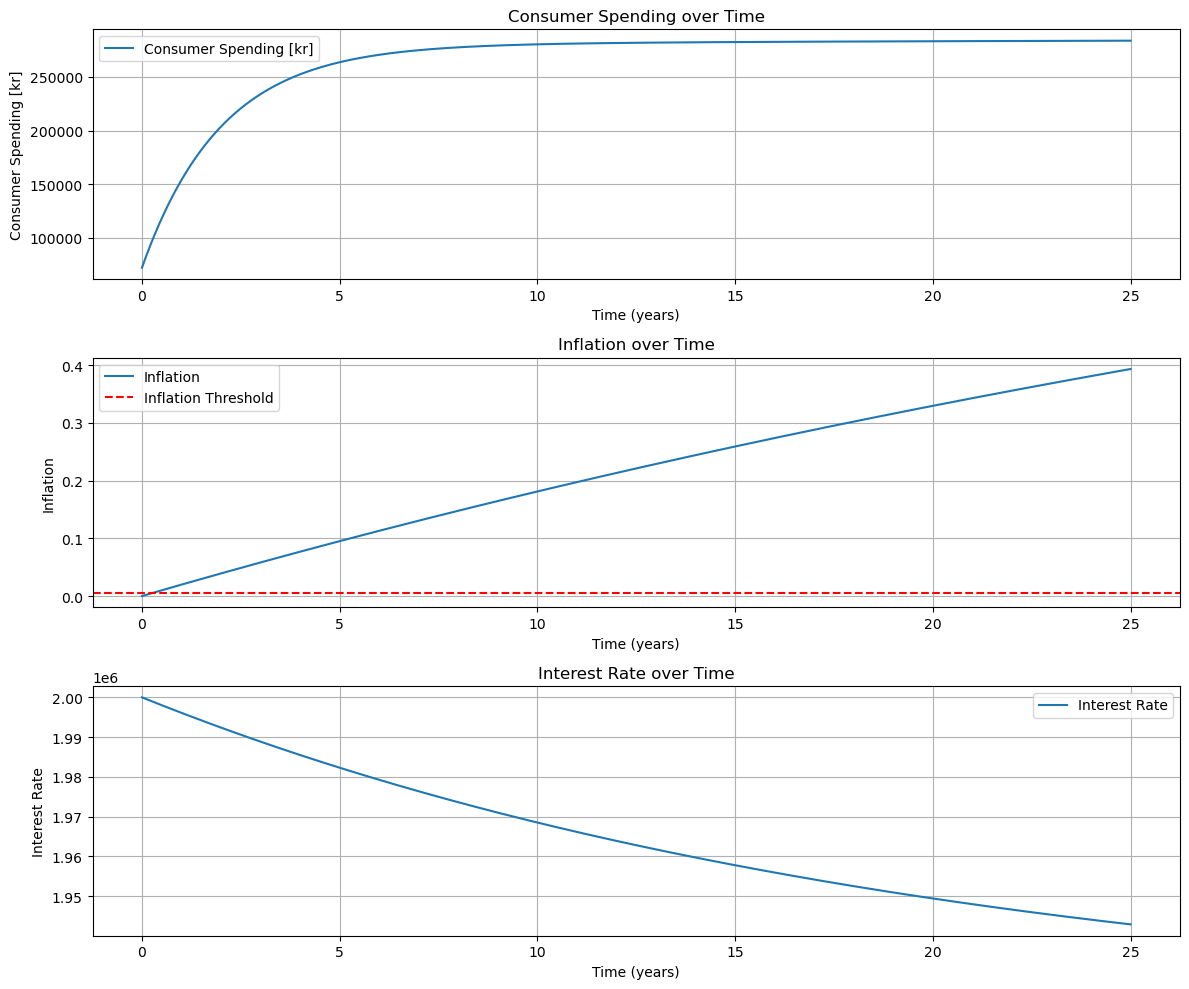

In [26]:
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt



# ODE system for consumer spending and inflation
def coupled_odes(t, y, alpha, beta, g, U, P, r, max_interest_increase, L0, A0, alpha_inflation, inflation_threshold, inflation_slope_threshold):
    F, inflation, L = y
    
    # Consumer spending ODE
    dF = alpha * (A0 - U - r * L) - beta * F
    
    # Inflation ODE
    if F/A0 > inflation_threshold:
        dinflation = alpha_inflation * (1 - inflation)
    else:
        dinflation = -alpha_inflation * inflation
    
    # Loan decreasing over time
    dL = -r * L + P
    
    return [dF, dinflation, dL]

# Initial conditions
y0 = [F0, 0, L0]

# Time vector from 0 to 25 years
t = np.linspace(0, 25, 10000)

# Set up ODE solver
solver = ode(coupled_odes)
solver.set_integrator('RK23')  # Use 'RK45' solver

# Set initial conditions and parameters
solver.set_initial_value(y0, t[0])
solver.set_f_params(alpha, beta, g, U, P, r, max_interest_increase, L0, A0, alpha_inflation, inflation_threshold, inflation_slope_threshold)

# Solve ODE
solution = np.zeros((len(t), len(y0)))
solution[0, :] = y0

for i in range(1, len(t)):
    solver.integrate(t[i])
    solution[i, :] = solver.y

# Plot results
plt.figure(figsize=(12, 10))

# Plot consumer spending
plt.subplot(3, 1, 1)
plt.plot(t, solution[:, 0], label='Consumer Spending [kr]')
plt.title('Consumer Spending over Time')
plt.xlabel('Time (years)')
plt.ylabel('Consumer Spending [kr]')
plt.legend()
plt.grid(True)

# Plot inflation
plt.subplot(3, 1, 2)
plt.plot(t, solution[:, 1], label='Inflation')
plt.axhline(y=inflation_threshold, color='r', linestyle='--', label='Inflation Threshold')
plt.title('Inflation over Time')
plt.xlabel('Time (years)')
plt.ylabel('Inflation')
plt.legend()
plt.grid(True)

# Plot interest rate
plt.subplot(3, 1, 3)
plt.plot(t, solution[:, 2], label='Interest Rate')
plt.title('Interest Rate over Time')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

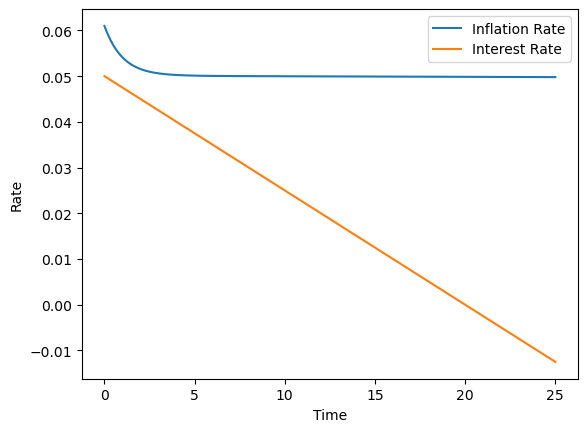

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the ODEs for inflation and interest rate
def inflation_interest_rate(y, t):
    I, r = y
    dIdt = -k1 * (I - I_target) + k2 * (r - r_base) * max(I, 0) + k3 * max(C - 0.7, 0) - k4 * max(0.5 - C, 0)
    drdt = 0.0025 if I > 0.02 and dIdt > 0 else (-0.0025 if I > 0.02 and dIdt < 0 else 0)
    return [dIdt, drdt]

# Initial conditions
I0 = 0.061  # Initial inflation rate (5%)
r0 = 0.05  # Initial interest rate
y0 = [I0, r0]

# Parameters
I_target = 0.02  # Target inflation rate (2%)
r_base = 0.02  # Base interest rate
k1, k2, k3, k4 = 1, 0.1, 0.1, 0.1  # Coefficients for the ODEs
C = 1.0  # Initial consumer spending habits

# Time grid
t = np.linspace(0, 25, 10000)

# Solve the ODEs
solution = odeint(inflation_interest_rate, y0, t)

# Extract the results
inflation = solution[:, 0]
interest_rate = solution[:, 1]

# Plot the results
plt.plot(t, inflation, label='Inflation Rate')
plt.plot(t, interest_rate, label='Interest Rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()

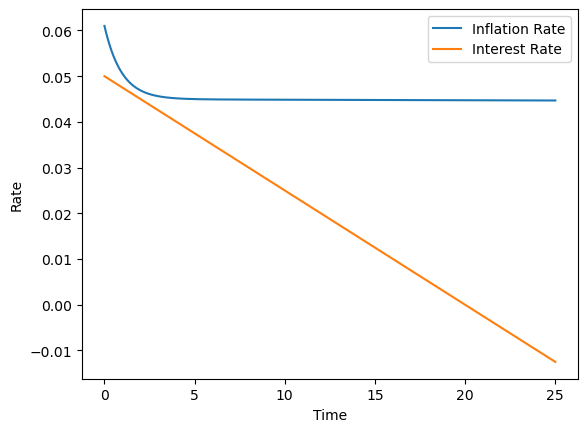

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
I_target = 0.025  # Target inflation rate (2.5%)
r_base = 0.06  # Base interest rate
k1, k2, k3, k4 = 1, 0.1, 0.1, 0.1  # Coefficients for the ODEs
C = 0.9  # Initial consumer spending habits

# Time settings
t0, t_final = 0, 25
dt = 0.1  # Time step

# Initial conditions
I = [0.061]  # Initial inflation rate (5%)
r = [0.05]  # Initial interest rate

# Euler's method for numerical integration
for t in np.arange(t0, t_final, dt):
    dIdt = -k1 * (I[-1] - I_target) + k2 * (r[-1] - r_base) * max(I[-1], 0) + k3 * max(C - 0.7, 0) - k4 * max(0.5 - C, 0)
    drdt = 0.0025 if I[-1] > I_target and dIdt > 0 else (-0.0025 if I[-1] > I_target and dIdt < 0 else 0)
    I.append(I[-1] + dt * dIdt)
    r.append(r[-1] + dt * drdt)

# Plot the results
time_points = np.arange(t0, t_final + dt, dt)
plt.plot(time_points, I, label='Inflation Rate')
plt.plot(time_points, r, label='Interest Rate')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.legend()
plt.show()